We solve the Bethe equation in the thermodynamic limit

$$
1 = 2\pi\rho(k) + \int_{-q}^q \theta'(k-k')\rho(k')dk',
$$

where

$$
\theta'(k) = -\frac{2c}{k^2+c^2}.
$$

If we rescale $k\to kq$ and $\rho(k)\to \rho(kq)$, then we can write everything in terms of $\tilde c \equiv c/q$ as

$$
1 = 2\pi\rho(k) -2\tilde c \int_{-1}^1 \frac{\rho(k')}{(k-k')^2+\tilde c^{2}}dk',
$$

We discretize $k$, then find the roots of the set of equations

$$
2\pi\rho(k_n) + \Delta k\sum_{m=1}^{M} \theta'(k_n-k_m)\rho(k_m) - 1 = 0,\qquad n=1, M
$$

where $\Delta k = 2/M$, with $M$ the number of points in the disretization.

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root

In [98]:
M = 100
c = 1

ρ0 = np.ones(M) / (2 * np.pi) # Initial guess

a = np.linspace(-1, 1, M)
b = np.linspace(-1, 1, M)
A, B = np.meshgrid(a, b)

K = - (2 / M) * 2 * c / ((A - B)**2 + c**2) # Kernel in the integral equation

In [106]:
def Bethe(ρ):
    return 2 * np.pi * ρ + np.dot(K,ρ) - 1

# Now find the solution
ρ_out = root(Bethe, ρ0).x 

In [100]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

<IPython.core.display.Javascript object>


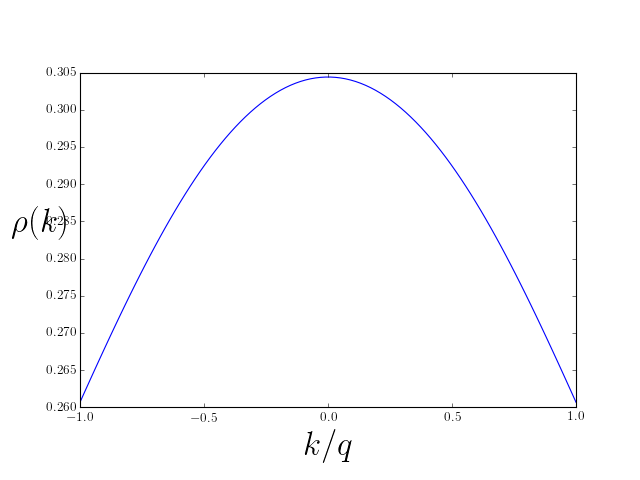

In [112]:
plt.plot(a, ρ_out)
plt.xlabel(r'$k/q$', fontsize = 30)
plt.ylabel(r'$\rho(k)$', fontsize = 30, rotation = 'horizontal')
plt.axes().set_aspect(30)
plt.show()